In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = './results-2021-12-18.csv'
df = pd.read_csv(file_path)

In [3]:
#多子图
def muti_axes(mode):
    import matplotlib.pyplot as plt
    if mode == 0:
        plt = plt.figure(figsize=(12.8, 4.8), dpi=100) # 通过figsize调整fig大小 SODA 9/15     
        ax1 = plt.subplots()
        ax1.spines["right"].set_color("none")
        # ax1.spines["left"].set_color("none")  # 保留x轴和y轴
        ax1.spines["top"].set_color("none")
        # ax1.spines["bottom"].set_color("none")
        return ax1
    if mode != 0:
        # plt = plt.figure(figsize=(12.8, 4.8), dpi=100)
        ax2 = plt.subplot(2,3,mode)
        ax2.spines["right"].set_color("none")
        # ax2.spines["left"].set_color("none")
        ax2.spines["top"].set_color("none")
        # ax2.spines["bottom"].set_color("none")
        return ax2


In [4]:
def xy_egy(algorithm,RQ):
    df1 = df[(df["algorithm"] == algorithm)&(df["RQ"]==RQ)]
    row_labels = df1.index[:]
    if RQ == 2.1:
        col_labels = df1.columns[[0,4,2,8]]
    elif RQ == 2.2:
        col_labels = df1.columns[[0,5,2,8]]
    df2 = df1.loc[row_labels,col_labels]
    df3 = df2.groupby(by="experiment_id").mean()
    x = df3.loc[df3.index[:],df3.columns[0]].to_numpy()
    y = df3.loc[df3.index[:],df3.columns[1]].to_numpy()
    return x,y


    

In [5]:
1#画图
#这个地方需要改一下  SODA 9/15注
from cProfile import label

def plot_bar1(ax,x,y):
    ax = muti_axes(ax)
    ax.set_ylim(0,1)
    p1 = ax.bar(x,y,200)
    ax.bar_label(p1, label_type='edge',padding=10)
    ax.set_xlabel("no_datapoints")
    ax.set_ylabel("train_energy(J)")
    ax.set_title("How no_datapoints impact train_energy(J)")

def plot_bar2(ax,x,y):
    ax = muti_axes(ax)
    ax.set_ylim(0,1)
    p1 = ax.bar(x,y,200)
    ax.bar_label(p1, label_type='edge',padding=10)
    ax.text(x=8700,y=1,s="all bar no_datapoints=3900",fontsize =12,verticalalignment="top",horizontalalignment="right",color = "b",bbox = dict(facecolor = "gray", alpha = 0.6))
    ax.set_xlabel("no_features")
    ax.set_ylabel("train_energy(J)")
    ax.set_title("How no_features impact train_energy(J)")

def plot_scatter(ax,algorithm):
    ax = muti_axes(ax)
    ax.set_xlabel("no_features")
    ax.set_ylabel("no_datapoints")
    # ,x=2500,y=1500 报错
    ax.set_title(algorithm,loc="left")
    x = list(xy_egy(algorithm,2.2)[0])
    for i in range(9):
        x.append(8169.0)
    y = []
    for i in range(10):
        y.append(3900.0)
    y.extend(list(xy_egy(algorithm,2.1)[0][:-1]))
    xy = list(zip(x,y))  
    s = list(xy_egy("SVM",2.2)[1])
    s1 = list(xy_egy("SVM",2.1)[1][:-1])
    s.extend(s1)
    data = list(zip(xy,s))
    x = []
    for i in data :
        x.append(i[0][0])
    y = []
    for i in data :
        y.append(i[0][1])
    s = []
    for i in data :
        if ax == 0:
            s.append(i[1]*400)
        else:
            s.append(i[1]*100)
    ax.scatter(x=x,y=y,s=s)
    
def plt_barh(ax):
    ax4 = muti_axes(ax)
    import matplotlib.pyplot as plt
    algorithms = df["algorithm"].drop_duplicates().tolist()
    alts = []
    y1 = []
    y2 = []
    for i in algorithms:
        xi,yi = xy_egy(i,2.1)
        y1.append(np.average(yi/xi)*np.average(xi))
        alts.append(i)
    for i in algorithms:
        xi,yi = xy_egy(i,2.2)
        y2.append(np.average(yi/xi)*np.average(xi))
    ax4.spines["right"].set_color("none")
    ax4.spines["top"].set_color("none")
    ax4.set_xlabel("Average_train_energy(J)")
    ax4.set_ylabel("Algorithms")
    x1 = [1,2,3,4,5,6]
    x2 = [1.4,2.4,3.4,4.4,5.4,6.4]
    ax4.barh(x1, y1, height=0.4, label='RQ=2.1')
    ax4.barh(x2, y2, height=0.4, label='RQ=2.2')
    ax4.set_yticks([1.2, 2.2, 3.2, 4.2, 5.2, 6.2], alts)

    ax4.legend()

    
    




    

In [6]:
file_path = './results-2021-12-18.csv'
df = pd.read_csv(file_path)

第二题

In [7]:

# df1 = df[(df["algorithm"] == 'SVM')&(df["RQ"]==2.2) ]
# row_labels = df1.index[:]
# col_labels = df1.columns[[0,5,2,8]]
# df2 = df1.loc[row_labels,col_labels]
# df2.columns


In [8]:
#用experiment_id分组，因为在RQ=2.2时，每个特征数对应一个experiment_id，每个实验进行30次，我们之后讲这30次实验的experiment_id（J）取平均
# df3 = df2.groupby(by="experiment_id").mean()
# df3

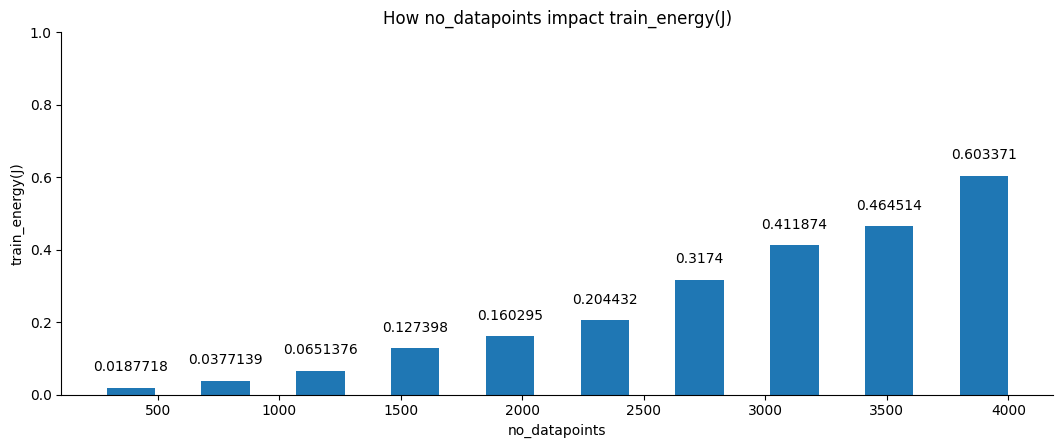

In [9]:
# x = df3.loc[df3.index[:],df3.columns[0]].to_numpy()
# y = df3.loc[df3.index[:],df3.columns[1]].to_numpy()
x,y = xy_egy("SVM",2.1)
plot_bar1(0,x,y)

#no_datapoint 都为3900


探索
怎么画2因素图？

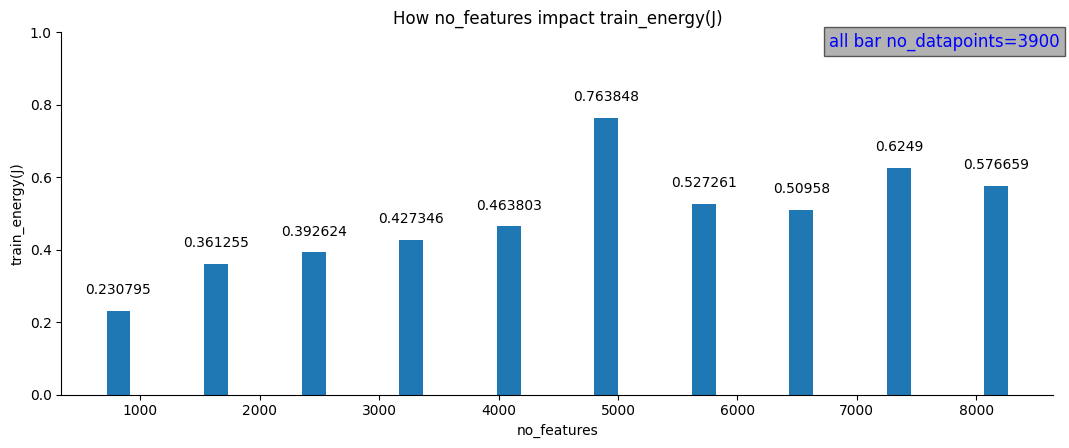

In [10]:
x,y = xy_egy("SVM",2.2)
plot_bar2(0,x,y)
#no_features 都为8169


第三题

现在先画一个svm的气泡图

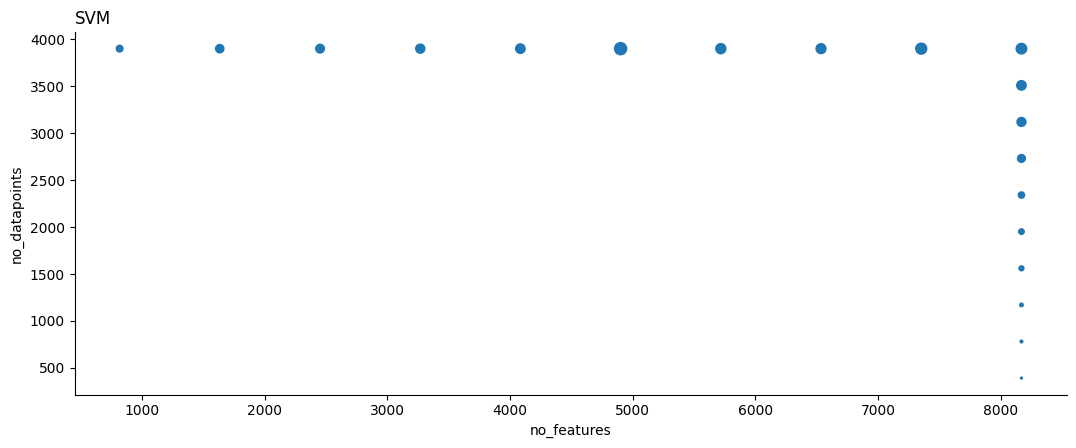

In [11]:
plot_scatter(0,"SVM")

In [12]:
#算法有这些
print(len(df["algorithm"].drop_duplicates()))
df["algorithm"].drop_duplicates()

6


0               AdaBoost
1          Decision Tree
2                    SVM
4     Bagging Classifier
6                    KNN
14         Random Forest
Name: algorithm, dtype: object

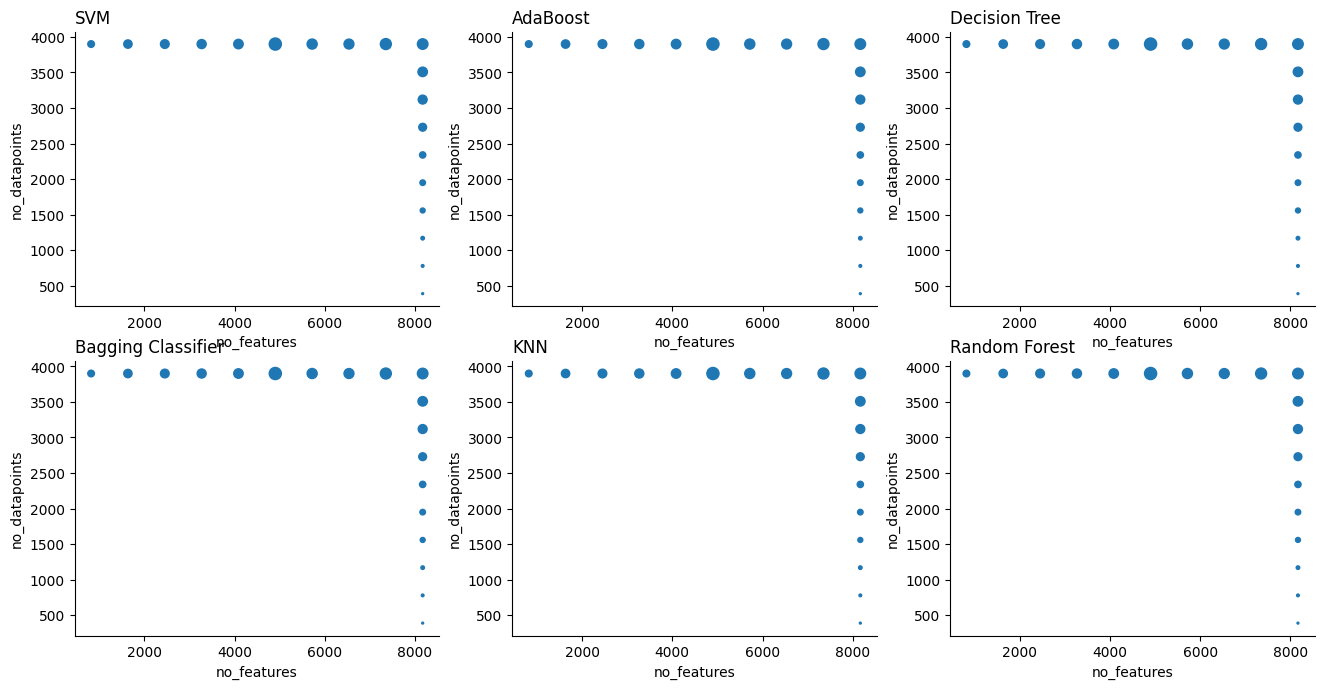

In [13]:
plt = plt.figure(figsize=(16, 8), dpi=100)
plot_scatter(1,"SVM")
plot_scatter(2,"AdaBoost")
plot_scatter(3,"Decision Tree")
plot_scatter(4,"Bagging Classifier")
plot_scatter(5,"KNN")
plot_scatter(6,"Random Forest")


第四题 

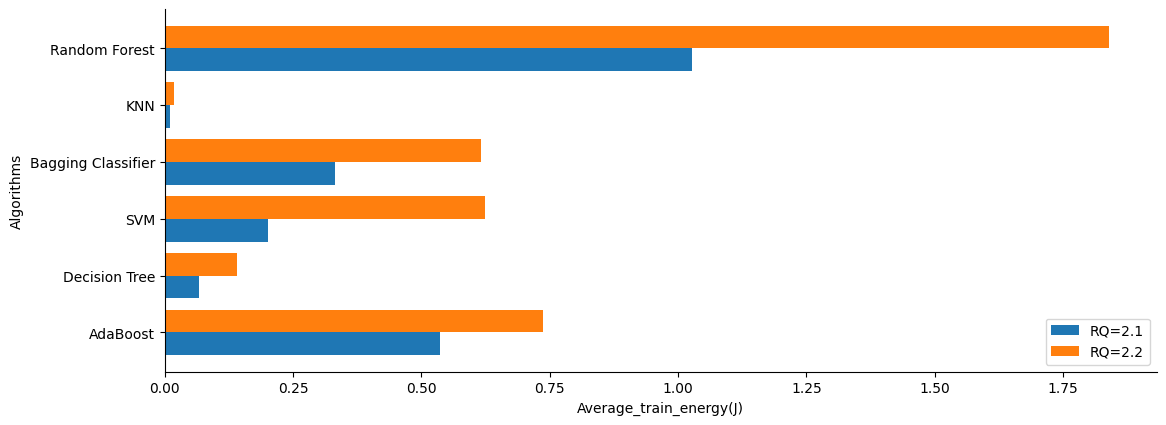

In [22]:
plt_barh(0)

In [23]:
# import matplotlib.pyplot as plt
